In [104]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')


In [57]:
match_data_df = pd.read_csv("match_data[1].csv", low_memory=False)
match_info_data = pd.read_csv("match_info_data[1].csv")


In [58]:
match_info_data.head()
len(match_info_data)
print("Columns are :", list(match_info_data.columns))

sorted_season_counts = match_info_data["season"].value_counts().reset_index().sort_values(by='season')


Columns are : ['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']


In [59]:
# Check for missing values
print("Missing values in match_info_data:")
print(match_info_data.isnull().sum())

Missing values in match_info_data:
id                  0
season              0
city               51
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner             19
win_by_runs         0
win_by_wickets      0
player_of_match     5
venue               0
umpire1             0
umpire2             0
umpire3             3
dtype: int64


In [60]:


print("Missing values in match_data_df:")
print(match_data_df.isnull().sum())

Missing values in match_data_df:
match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     236165
noballs                   242799
byes                      243189
legbyes                   240039
penalty                   243815
wicket_type               231750
player_dismissed          231750
other_wicket_type         243817
other_player_dismissed    243817
cricsheet_id                   0
dtype: int64


In [105]:


# Handle missing values in match_info_data
# Fill NaN values in the 'winner' column with 'No Result' for clarity
match_info_data['winner'].fillna('No Result', inplace=True)

# Drop duplicates if any
match_info_data.drop_duplicates(inplace=True)
match_data_df.drop_duplicates(inplace=True)

# Check for data types and convert if necessary
print("\nData types in match_info_data:")
print(match_info_data.dtypes)

print("\nData types in match_data_df:")
print(match_data_df.dtypes)


Data types in match_info_data:
id                          int64
season                   category
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
umpire3                    object
dtype: object

Data types in match_data_df:
match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_st

In [120]:


# Convert 'season' to a categorical type for better performance
match_info_data['season'] = match_info_data['season'].astype('category')

In [63]:


# Check for erroneous entries (e.g., negative values in 'win_by_runs' or 'win_by_wickets')
match_info_data = match_info_data[match_info_data['win_by_runs'] >= 0]
match_info_data = match_info_data[match_info_data['win_by_wickets'] >= 0]

In [64]:


# Ensure the 'date' column is in datetime format
match_info_data['date'] = pd.to_datetime(match_info_data['date'], errors='coerce')

In [65]:


# After cleaning, check the datasets again
print("\nCleaned match_info_data:")
print(match_info_data.info())

print("\nCleaned match_data_df:")
print(match_data_df.info())



Cleaned match_info_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1024 non-null   int64         
 1   season           1024 non-null   category      
 2   city             973 non-null    object        
 3   date             1024 non-null   datetime64[ns]
 4   team1            1024 non-null   object        
 5   team2            1024 non-null   object        
 6   toss_winner      1024 non-null   object        
 7   toss_decision    1024 non-null   object        
 8   result           1024 non-null   object        
 9   dl_applied       1024 non-null   int64         
 10  winner           1024 non-null   object        
 11  win_by_runs      1024 non-null   int64         
 12  win_by_wickets   1024 non-null   int64         
 13  player_of_match  1019 non-null   object        
 14  venue         

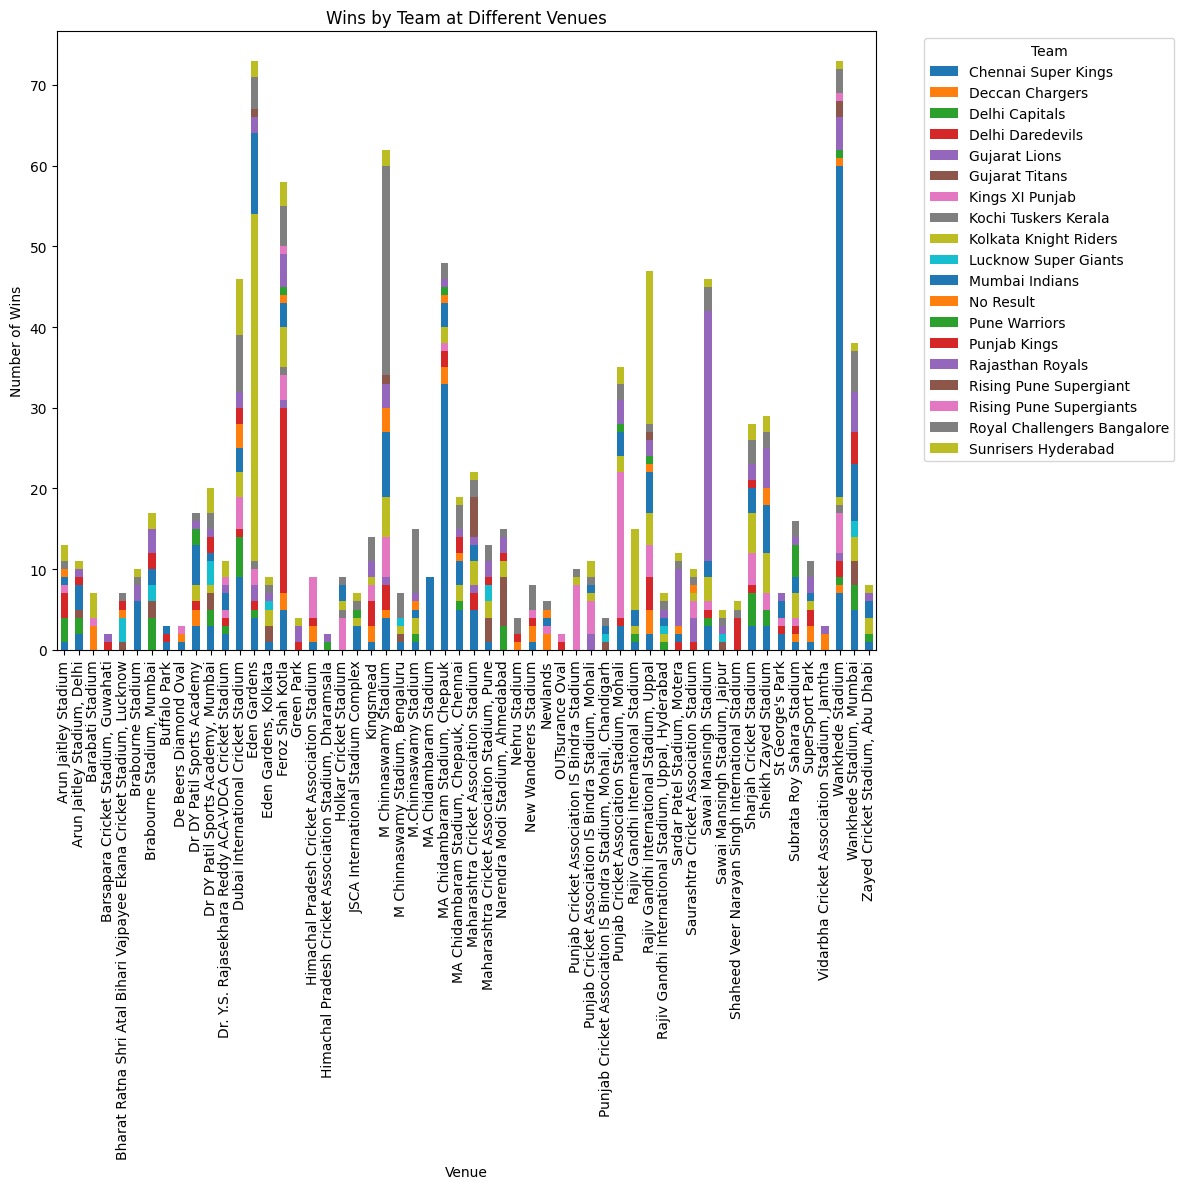

In [117]:
# Wins by Team and Venue
normal_matches = match_info_data[match_info_data['result'] == 'normal']
venue_team_wins = normal_matches.groupby(['venue', 'winner']).size().unstack(fill_value=0)
venue_team_wins.plot(kind='bar', stacked=True, figsize=(12, 12))
plt.title('Wins by Team at Different Venues')
plt.xlabel('Venue')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [68]:


print("Total Number of matches played are :", len(match_info_data))
print("Total number of unique seasons are :", len(list(match_info_data["season"].unique())))
print("Different cities where IPL matches were played :", list(match_info_data["city"].unique()))
print("Total number of cities where IPL matches were played :", len(list(match_info_data["city"].unique())))
print("Venues for IPL matches : \n ")
print("-" * 100)

Total Number of matches played are : 1024
Total number of unique seasons are : 16
Different cities where IPL matches were played : ['Ahmedabad', 'Chennai', 'Mumbai', 'Bengaluru', 'Kolkata', 'Delhi', 'Dharamsala', 'Hyderabad', 'Lucknow', 'Jaipur', 'Chandigarh', 'Guwahati', 'Navi Mumbai', 'Pune', 'Dubai', 'Sharjah', 'Abu Dhabi', nan, 'Visakhapatnam', 'Indore', 'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack', 'Kochi', 'Nagpur', 'Johannesburg', 'Centurion', 'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley', 'East London', 'Cape Town']
Total number of cities where IPL matches were played : 36
Venues for IPL matches : 
 
----------------------------------------------------------------------------------------------------


In [69]:



all_venues_with_serial = [print(f"{i}. {venue}") for i, venue in enumerate(match_info_data["venue"].unique(), 1)]
all_teams = list(set(list(match_info_data["team1"].unique()) + list(match_info_data["team2"].unique())))
print("All IPL Teams  : \n ")
print("-" * 100)

1. Narendra Modi Stadium, Ahmedabad
2. MA Chidambaram Stadium, Chepauk, Chennai
3. Wankhede Stadium, Mumbai
4. M Chinnaswamy Stadium, Bengaluru
5. Eden Gardens, Kolkata
6. Arun Jaitley Stadium, Delhi
7. Himachal Pradesh Cricket Association Stadium, Dharamsala
8. Rajiv Gandhi International Stadium, Uppal, Hyderabad
9. Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow
10. Sawai Mansingh Stadium, Jaipur
11. Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh
12. Barsapara Cricket Stadium, Guwahati
13. Brabourne Stadium, Mumbai
14. Dr DY Patil Sports Academy, Mumbai
15. Maharashtra Cricket Association Stadium, Pune
16. Dubai International Cricket Stadium
17. Sharjah Cricket Stadium
18. Zayed Cricket Stadium, Abu Dhabi
19. Sheikh Zayed Stadium
20. Rajiv Gandhi International Stadium
21. Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
22. MA Chidambaram Stadium
23. Punjab Cricket Association IS Bindra Stadium
24. Wankhede Stadium
25. M.Chinnaswamy Stadium


In [70]:


printing_ipl_teams = [print(f"{i}. {team}") for i, team in enumerate(all_teams, 1)]
nan_matches = match_info_data[match_info_data["winner"].isna()]
print("Total number of tied matches :", len(nan_matches))
print("-" * 100)
print("Matches where 'winner' column has NaN values:")
nan_matches

1. Rising Pune Supergiant
2. Mumbai Indians
3. Rajasthan Royals
4. Gujarat Titans
5. Kochi Tuskers Kerala
6. Delhi Capitals
7. Deccan Chargers
8. Lucknow Super Giants
9. Kolkata Knight Riders
10. Kings XI Punjab
11. Pune Warriors
12. Chennai Super Kings
13. Delhi Daredevils
14. Gujarat Lions
15. Sunrisers Hyderabad
16. Rising Pune Supergiants
17. Royal Challengers Bangalore
18. Punjab Kings
Total number of tied matches : 0
----------------------------------------------------------------------------------------------------
Matches where 'winner' column has NaN values:


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [121]:


match_info_data["winner"].value_counts().reset_index()
season_winner_counts = match_info_data.groupby(['season', 'winner']).size().reset_index(name='wins')
idx = season_winner_counts.groupby('season')['wins'].transform(max) == season_winner_counts['wins']
most_wins_per_season = season_winner_counts[idx]

normal_matches = match_info_data[match_info_data['result'] == 'normal']
batting_first_wins = normal_matches[normal_matches['win_by_runs'] > 0]['winner'].value_counts()
batting_second_wins = normal_matches[normal_matches['win_by_wickets'] > 0]['winner'].value_counts()

print("Team with most wins when batting first:")
print(batting_first_wins.idxmax())
print("Team with most wins when batting second:")
print(batting_second_wins.idxmax())

Team with most wins when batting first:
Mumbai Indians
Team with most wins when batting second:
Mumbai Indians


In [72]:


normal_matches = match_info_data[match_info_data['result'] == 'normal']
runs_wins = normal_matches[normal_matches['win_by_runs'] > 0]['winner'].value_counts()
wickets_wins = normal_matches[normal_matches['win_by_wickets'] > 0]['winner'].value_counts()

print("Team with most wins by runs:")
print(runs_wins.idxmax())
print("Team with most wins by wickets:")
print(wickets_wins.idxmax())

Team with most wins by runs:
Mumbai Indians
Team with most wins by wickets:
Mumbai Indians


In [122]:


normal_matches = match_info_data[match_info_data['result'] == 'normal']
season_team_wins = normal_matches.groupby(['season', 'winner']).size().reset_index(name='wins')
season_total_matches = normal_matches.groupby('season').size().reset_index(name='total_matches')
season_performance = pd.merge(season_team_wins, season_total_matches, on='season')
season_performance['win_percentage'] = (season_performance['wins'] / season_performance['total_matches']) * 100
season_performance_pivot = season_performance.pivot(index='season', columns='winner', values='win_percentage')

normal_matches = match_info_data[match_info_data['result'] == 'normal']
team_wins = normal_matches['winner'].value_counts()
total_matches = normal_matches['team1'].value_counts() + normal_matches['team2'].value_counts()
win_percentage = (team_wins / total_matches) * 100
win_percentage_sorted = win_percentage.sort_values(ascending=False)

print("Total matches where DL method was applied :", match_info_data["dl_applied"].value_counts()[1])
output_df = match_info_data[((match_info_data["win_by_runs"] < 10) &  (match_info_data["win_by_runs"] != 0)) | ((match_info_data["win_by_wickets"] < 3) & (match_info_data["win_by_wickets"] != 0))]
print("Total matches with the condition of - won by a margin of less than 10 runs/less than 3 wickets :", len(output_df))

Total matches where DL method was applied : 21
Total matches with the condition of - won by a margin of less than 10 runs/less than 3 wickets : 110


In [74]:


toss_winner = match_info_data['toss_winner']
winner = match_info_data['winner']
matches_won_by_toss_winner = (toss_winner == winner).sum()
total_matches = len(match_info_data)
percentage_won = (matches_won_by_toss_winner / total_matches) * 100
print("Percentage of matches won by the toss winner:", percentage_won)

result_counts = match_info_data['result'].value_counts().reset_index()
print("Number of matches with different types of results:")
result_counts

Percentage of matches won by the toss winner: 50.48828125
Number of matches with different types of results:


,result,count
0,normal,1003
1,D/L,21


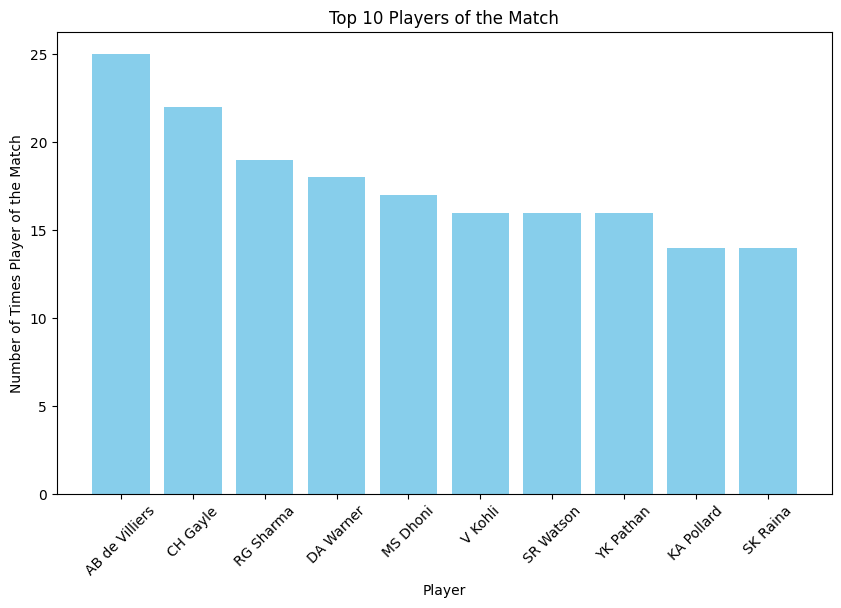

In [75]:


player_counts = match_info_data["player_of_match"].value_counts().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(player_counts['player_of_match'][:10], player_counts['count'][:10], color='skyblue')
plt.xlabel('Player')
plt.ylabel('Number of Times Player of the Match')
plt.title('Top 10 Players of the Match')
plt.xticks(rotation=45)
plt.show()

In [76]:


venue_counts = match_info_data["venue"].value_counts().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(
    x=venue_counts['venue'][:10],
    y=venue_counts['count'][:10],
    marker_color='red'
))
fig.update_layout(
    title='Top 10 Venues of IPL',
    xaxis=dict(title='Venues'),
    yaxis=dict(title='Hosted IPL Matches'),
    xaxis_tickangle=-45
)
pio.show(fig)

In [77]:

venue_match_counts = match_info_data['venue'].value_counts()
venue_win_percentages = pd.DataFrame(index=match_info_data['venue'].unique(), columns=match_info_data['team1'].unique())
for venue in venue_win_percentages.index:
    venue_matches = match_info_data[match_info_data['venue'] == venue]
    for team in venue_win_percentages.columns:
        venue_win_percentages.at[venue, team] = venue_matches[(venue_matches['winner'] == team)].shape[0]
for venue in venue_win_percentages.index:
    venue_win_percentages.loc[venue] = venue_win_percentages.loc[venue] / venue_match_counts[venue] * 100
print("Win percentages at different venues:")
print("-" * 70)
venue_win_percentages

venue_avg_win_margin = match_info_data.groupby('venue')[['win_by_runs', 'win_by_wickets']].mean()
print("Average Winning Margin Across Different Venues:")
print("-" * 70)
venue_avg_win_margin

Win percentages at different venues:
----------------------------------------------------------------------
Average Winning Margin Across Different Venues:
----------------------------------------------------------------------


,win_by_runs,win_by_wickets
venue,,
Arun Jaitley Stadium,11.714286,2.500000
"Arun Jaitley Stadium, Delhi",15.636364,3.727273
Barabati Stadium,10.428571,2.857143
"Barsapara Cricket Stadium, Guwahati",31.000000,0.000000
"Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",11.428571,1.000000
Brabourne Stadium,13.600000,2.500000
"Brabourne Stadium, Mumbai",13.352941,3.352941
Buffalo Park,29.000000,2.333333
De Beers Diamond Oval,17.666667,3.333333


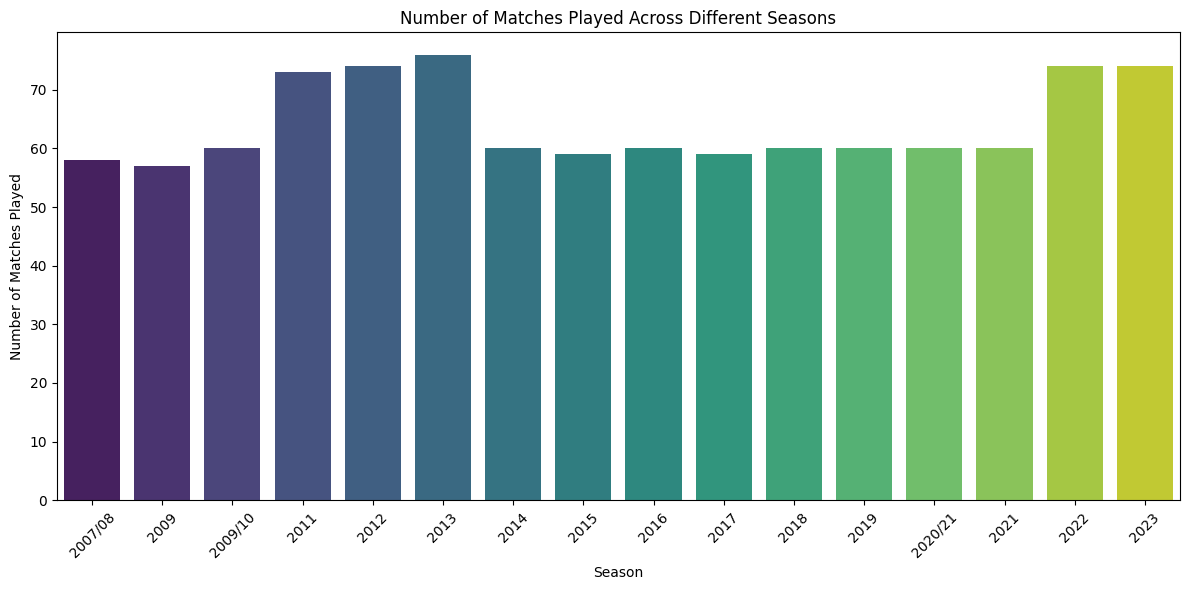

In [106]:


matches_per_season = match_info_data['season'].value_counts().reset_index().rename(columns={'season': 'Season', 'count': 'Matches'})
matches_per_season = matches_per_season.sort_values(by='Season')
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Matches', data=matches_per_season, palette='viridis')
plt.title('Number of Matches Played Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

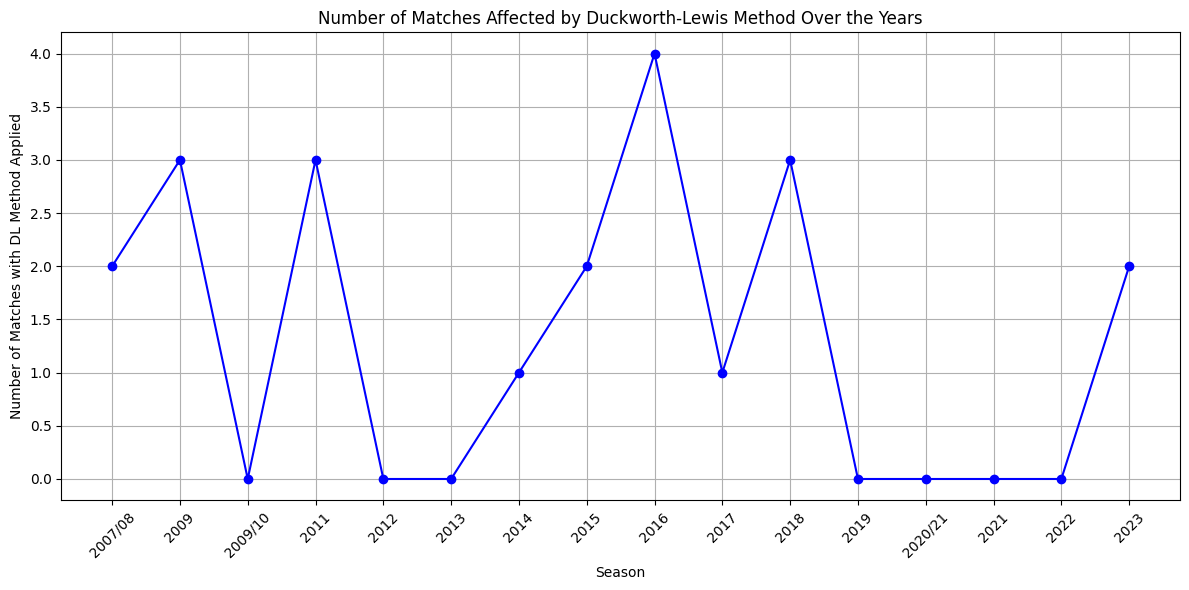

In [79]:


dl_matches = match_info_data[match_info_data['dl_applied'] == 1]
dl_matches_per_season = dl_matches['season'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(dl_matches_per_season.index, dl_matches_per_season.values, marker='o', color='blue', linestyle='-')
plt.title('Number of Matches Affected by Duckworth-Lewis Method Over the Years')
plt.xlabel('Season')
plt.ylabel('Number of Matches with DL Method Applied')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:


all_umpires = pd.concat([match_info_data['umpire1'], match_info_data['umpire2']], ignore_index=True).reset_index()
umpire_counts = all_umpires[0].value_counts().reset_index().rename(columns={0: 'Umpires', "count": 'Matches'}).head()
umpire_counts

umpire_outcome_table = pd.crosstab(match_info_data['umpire1'], match_info_data['winner'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(umpire_outcome_table)
formatted_p_value = "{:.2e}".format(p)
print("p-value:", formatted_p_value)

p-value: 1.70e-08


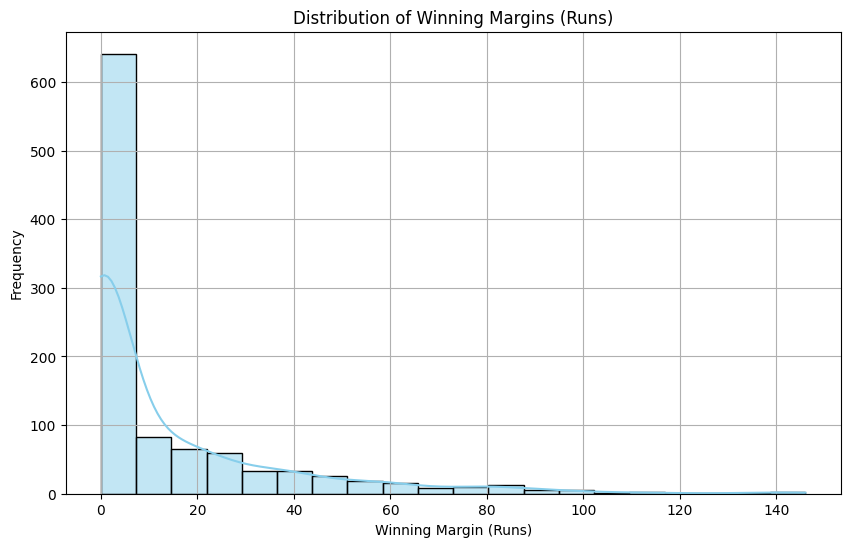

In [81]:


valid_matches = match_info_data[match_info_data['result'] != 'no result']
plt.figure(figsize=(10, 6))
sns.histplot(valid_matches['win_by_runs'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Winning Margins (Runs)')
plt.xlabel('Winning Margin (Runs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

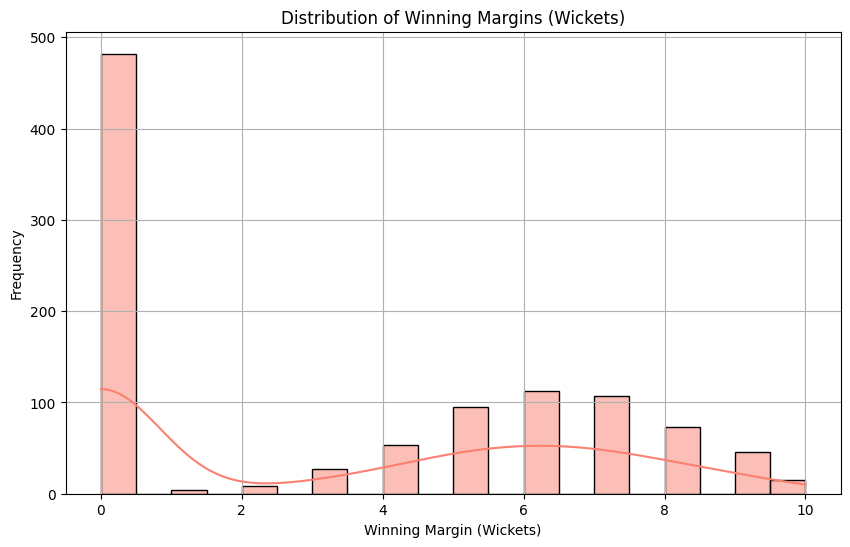

In [82]:


plt.figure(figsize=(10, 6))
sns.histplot(valid_matches['win_by_wickets'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Winning Margins (Wickets)')
plt.xlabel('Winning Margin (Wickets)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


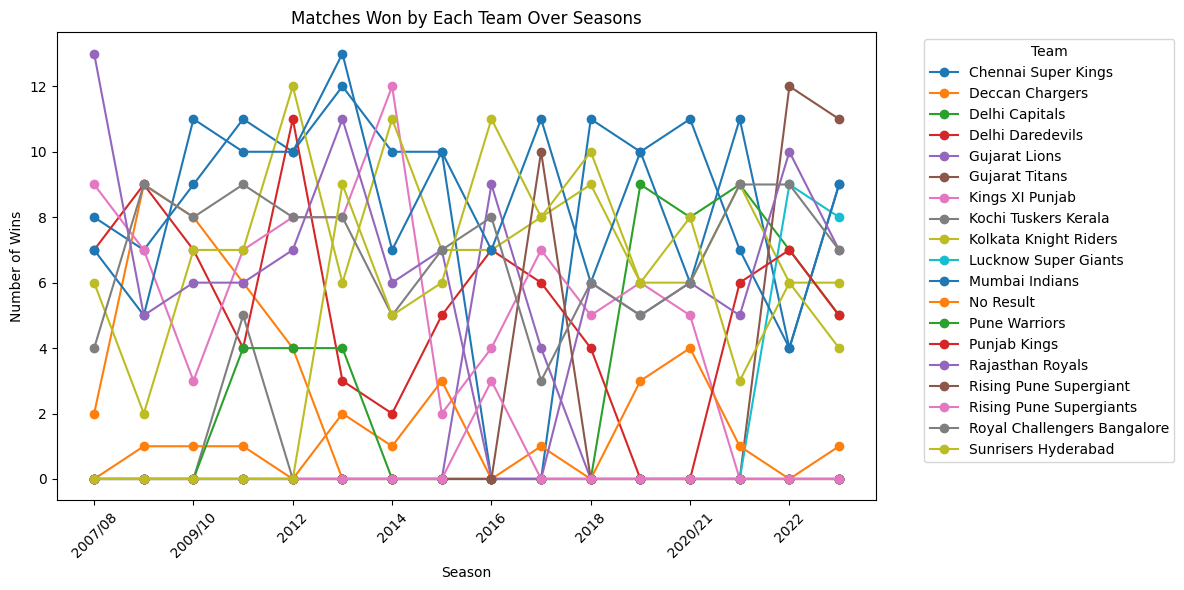

In [123]:
# Matches Won by Each Team Over Seasons
matches_won_over_seasons = normal_matches.groupby(['season', 'winner']).size().unstack(fill_value=0)
matches_won_over_seasons.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Matches Won by Each Team Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


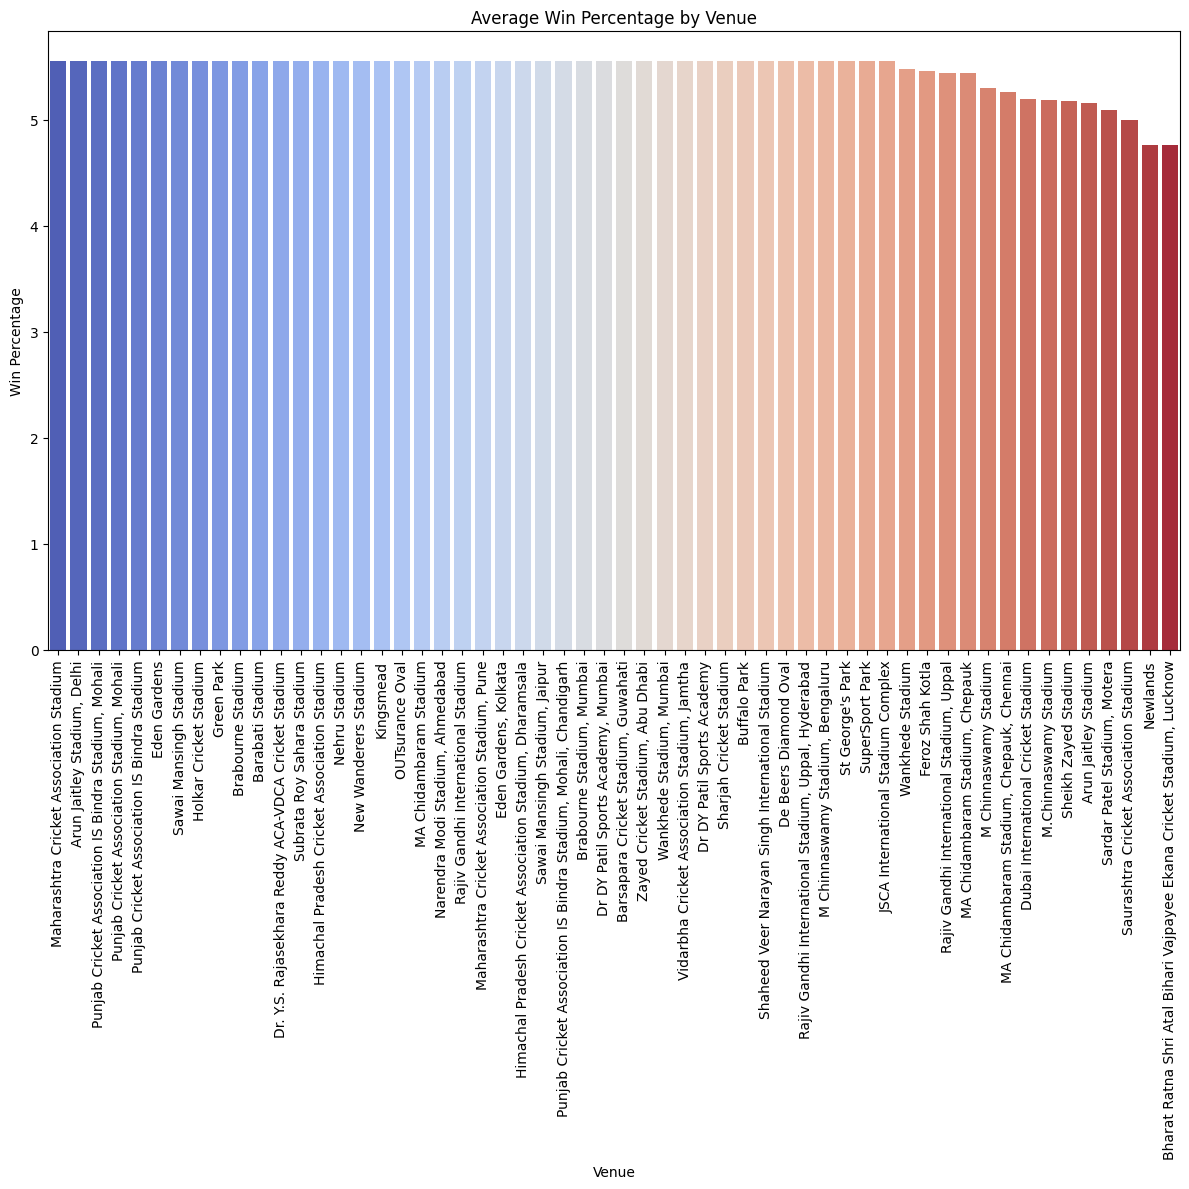

In [115]:
# Win Percentage by Venue
venue_win_percentage = venue_win_percentages.mean(axis=1).sort_values(ascending=False)
plt.figure(figsize=(12, 12))
sns.barplot(x=venue_win_percentage.index, y=venue_win_percentage.values, palette='coolwarm')
plt.title('Average Win Percentage by Venue')
plt.xlabel('Venue')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


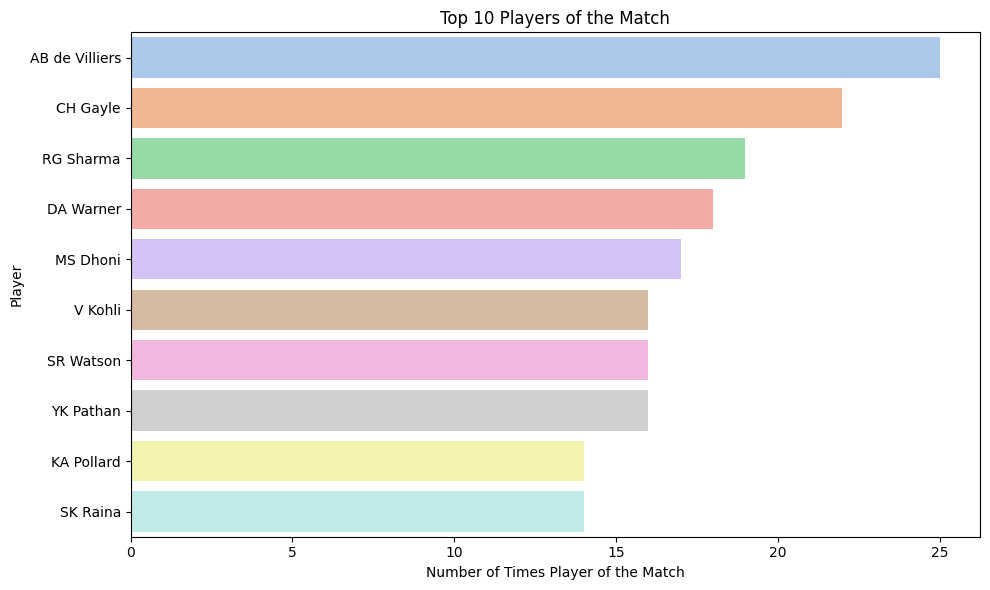

In [124]:
# Player of the Match by Team
player_of_the_match_counts = match_info_data['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=player_of_the_match_counts.values, y=player_of_the_match_counts.index, palette='pastel')
plt.title('Top 10 Players of the Match')
plt.xlabel('Number of Times Player of the Match')
plt.ylabel('Player')
plt.tight_layout()
plt.show()


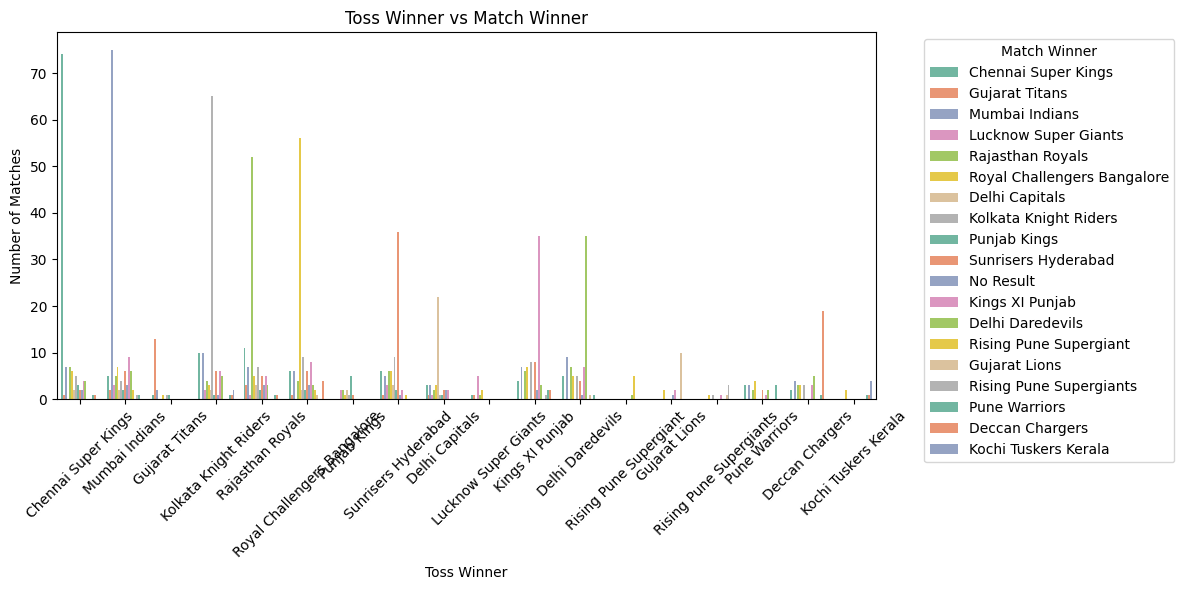

In [125]:
# Toss Winner vs Match Winner
plt.figure(figsize=(12, 6))
sns.countplot(data=match_info_data, x='toss_winner', hue='winner', palette='Set2')
plt.title('Toss Winner vs Match Winner')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Match Winner', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [87]:
match_data_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


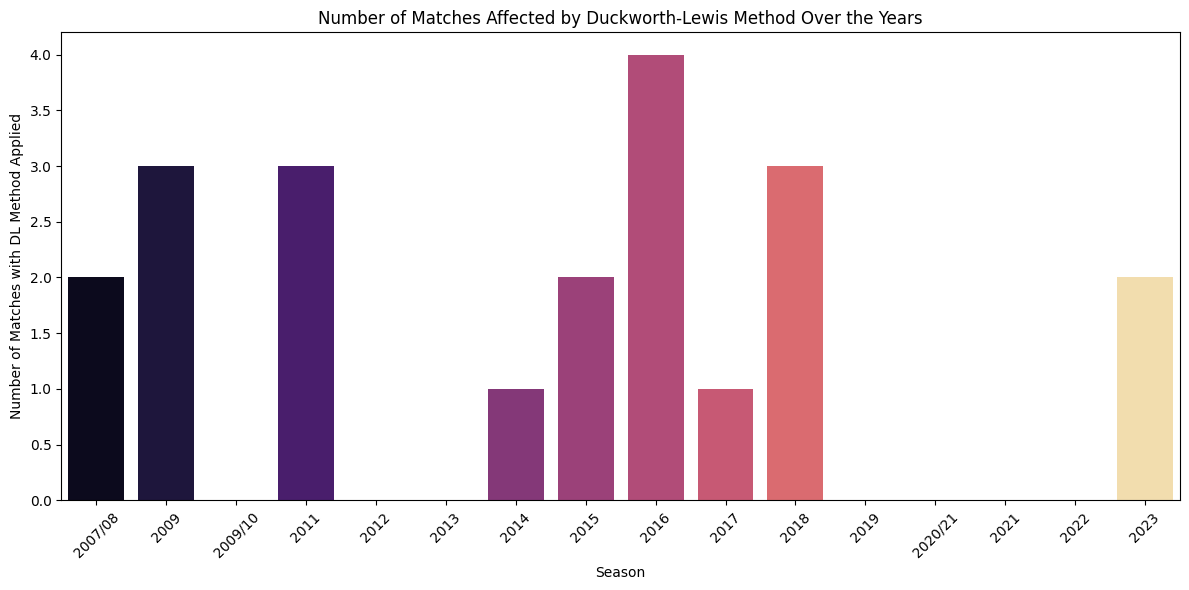

In [126]:
# Duckworth-Lewis Matches Over Seasons
dl_matches_per_season = match_info_data[match_info_data['dl_applied'] == 1]['season'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=dl_matches_per_season.index, y=dl_matches_per_season.values, palette='magma')
plt.title('Number of Matches Affected by Duckworth-Lewis Method Over the Years')
plt.xlabel('Season')
plt.ylabel('Number of Matches with DL Method Applied')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Bivariate

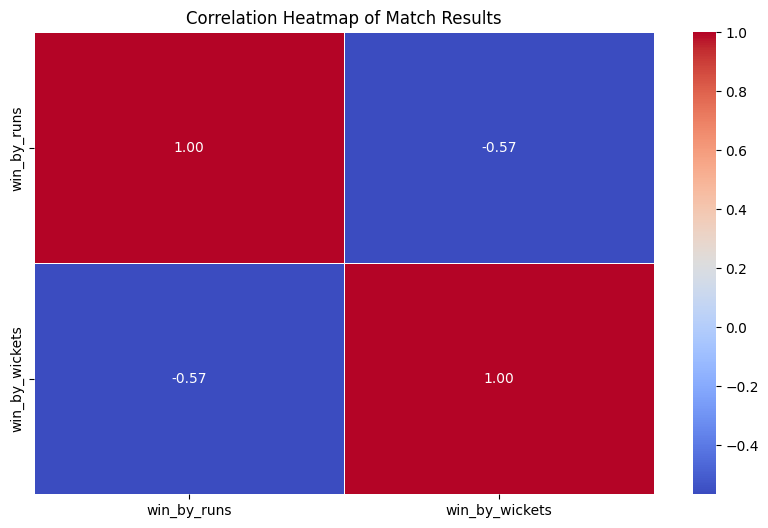

In [33]:
# Correlation Heatmap
correlation_data = match_info_data[['win_by_runs', 'win_by_wickets']]
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Match Results')
plt.show()


In [51]:
list(match_info_data.columns)

['id',
 'season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [89]:
merged_df = pd.merge(match_data_df, match_info_data, left_on='match_id', right_on='id')


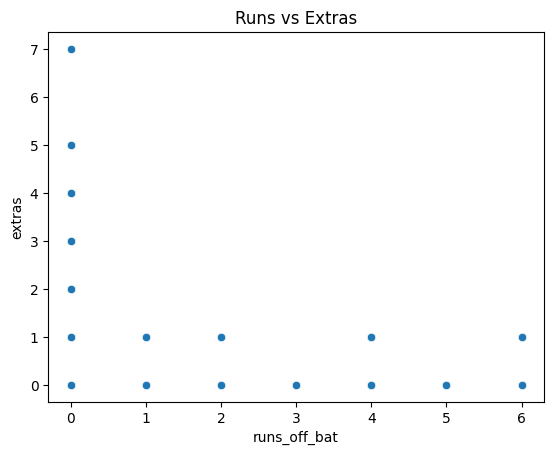

In [90]:
# Scatter plot between runs scored and extras
sns.scatterplot(data=merged_df, x='runs_off_bat', y='extras')
plt.title('Runs vs Extras')
plt.show()


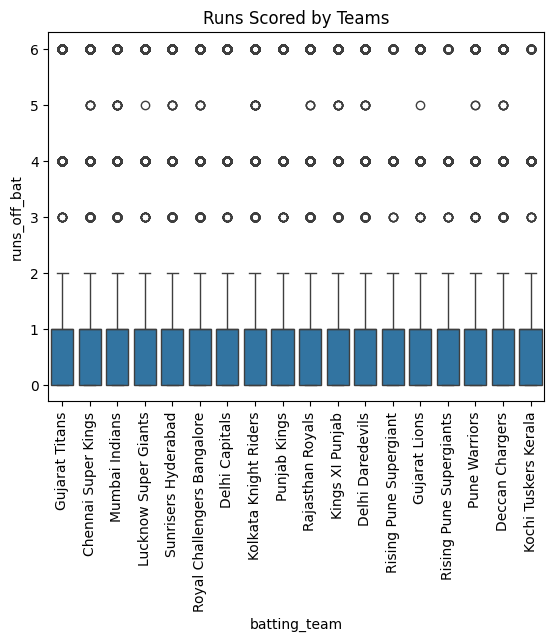

In [127]:
# Box plot to compare runs scored by different teams
sns.boxplot(x='batting_team', y='runs_off_bat', data=merged_df)
plt.xticks(rotation=90)
plt.title('Runs Scored by Teams')
plt.show()


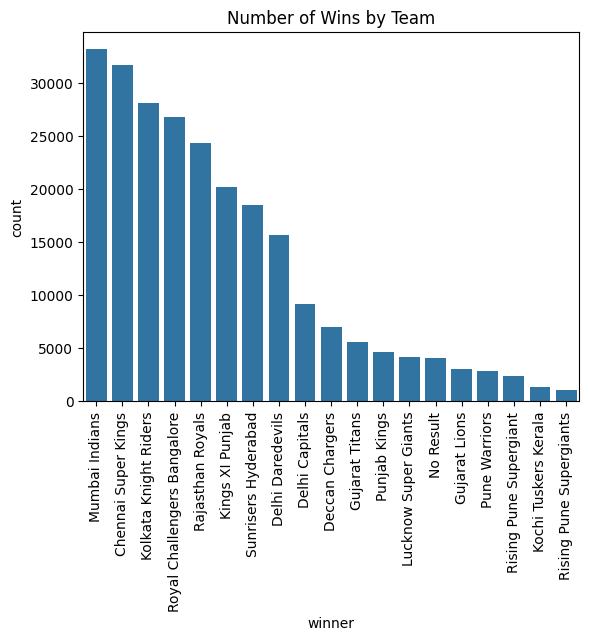

In [92]:
# Bar plot to compare the number of wins by teams
sns.countplot(x='winner', data=merged_df, order=merged_df['winner'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Wins by Team')
plt.show()


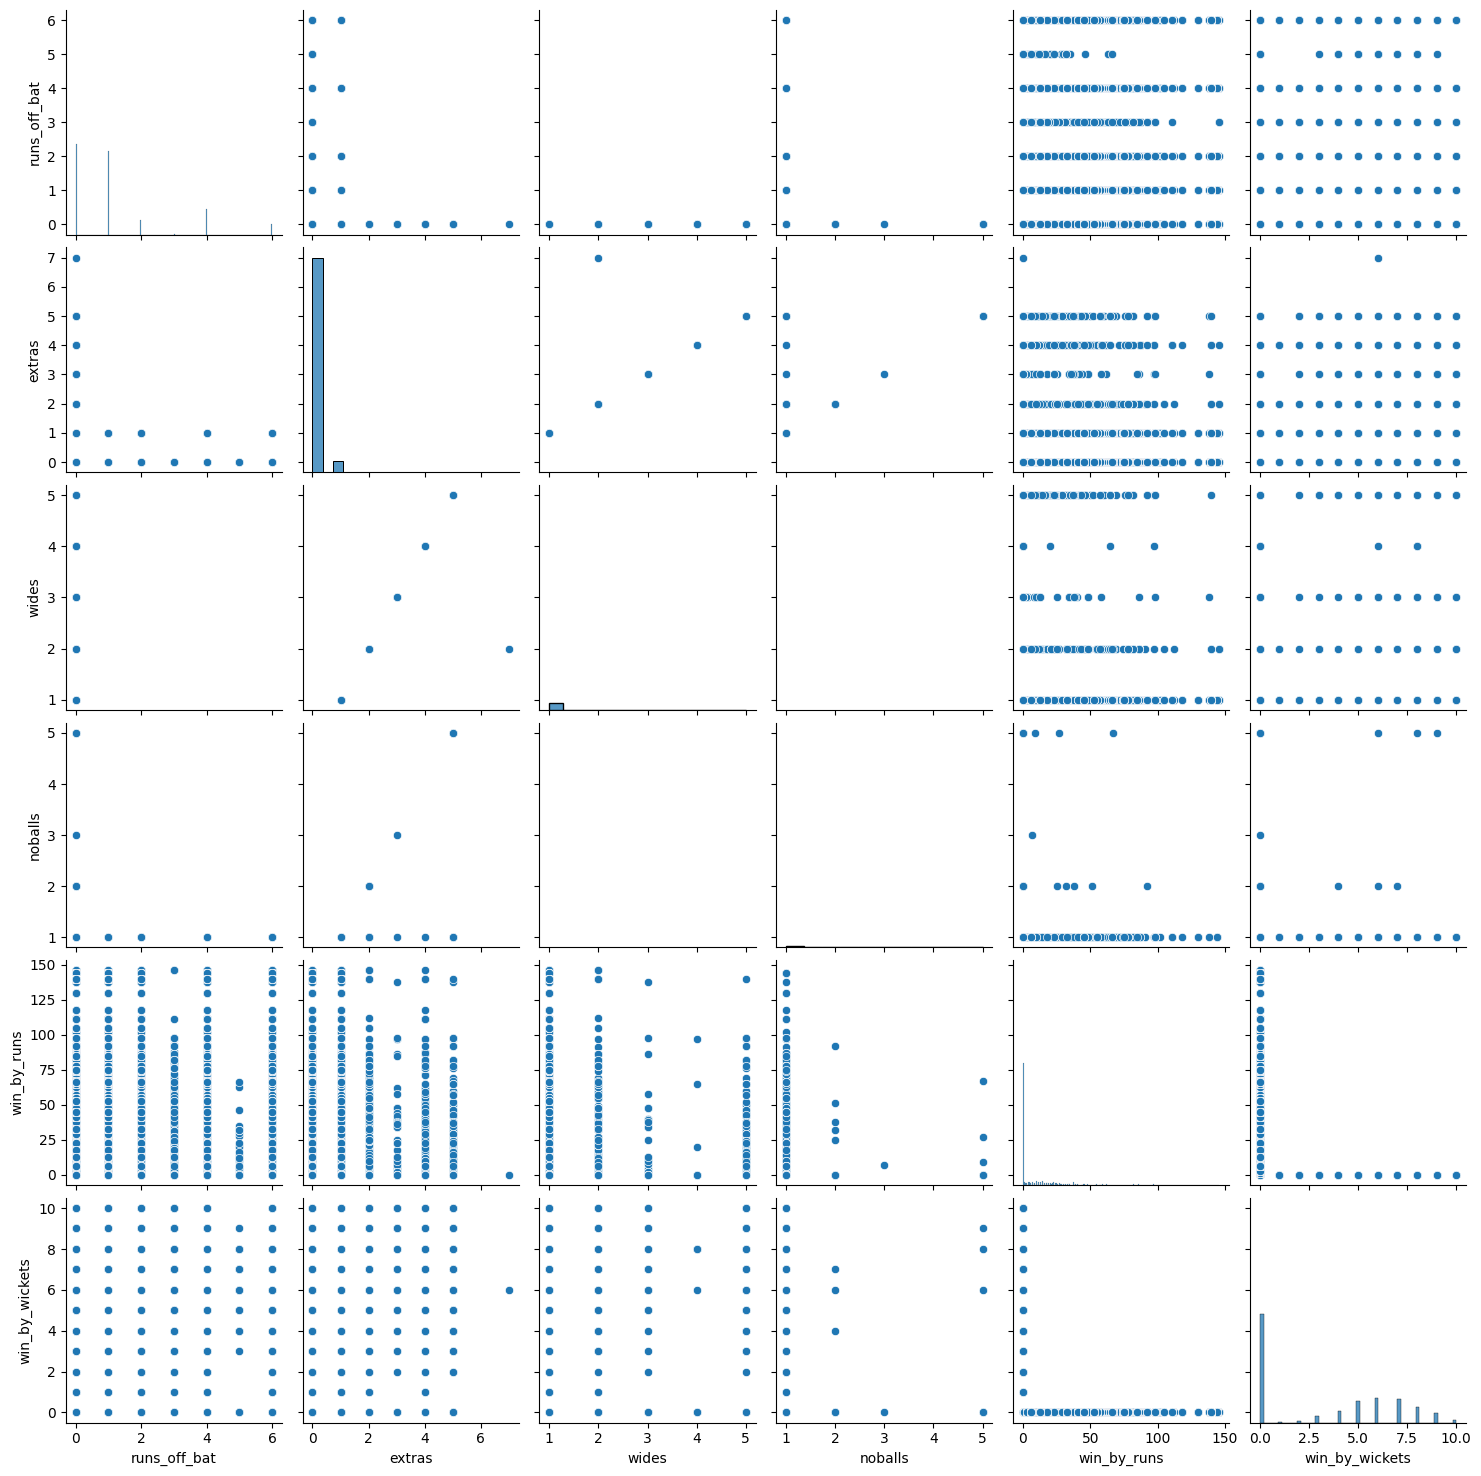

In [93]:
# Pair plot for numerical features
sns.pairplot(merged_df[['runs_off_bat', 'extras', 'wides', 'noballs', 'win_by_runs', 'win_by_wickets']])
plt.show()


In [100]:
# Rename the columns manually if necessary
merged_df.rename(columns={'season_x': 'season', 'season_y': 'season_info'}, inplace=True)

# Check if the season column is present now
print(merged_df.columns)



Index(['match_id', 'season', 'start_date', 'venue_x', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id', 'id', 'season_info', 'city',
       'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result',
       'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue_y', 'umpire1', 'umpire2', 'umpire3'],
      dtype='object')


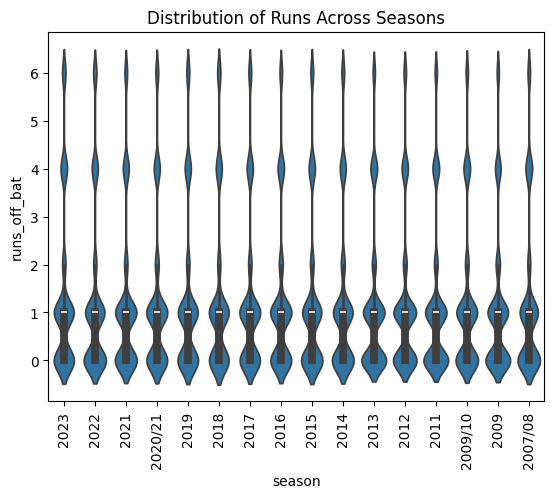

In [118]:
# Violin plot to visualize the distribution of runs per season
sns.violinplot(x='season', y='runs_off_bat', data=merged_df)
plt.xticks(rotation=90)
plt.title('Distribution of Runs Across Seasons')
plt.show()